## Exploratory Data Analysis of Crime in Chicago
### <span style="color:#95B">*Understanding the relationship between time of day, location, and type of crime commited between the years of 2012 - 2017 in Chicago, IL.*</span>

Often referred to in pop-culture as "Chiraq", a play on words referring to levels of violence experienced in the Second Persian Gulf War in Iraq; Chicago has some of the highest crime rates across the United States. Being that crimes can vary among a wide array of categories, it is likely that the occurence frequencies of certain crimes may be affected by parameters such as location or time of day. It is imperative to gain a better understanding of high risk locations and times of day so that civillians, law enforcement and goverments are able to make better decisions aimed at improving overall inhabitant safety.

In this exploratory analysis I will analyze a crime dataset obtained from Kaggle.com in an attempt to gain a better understanding about the relationship between types of crime and how their occurances vary with time and place. The conclusions drawn from this analysis will lead to better decision making regarding day-to-day life for the inhabitants of Chicago.

## Methods
### Data Colleciton

This dataset was aquired from [Kaggle](https://www.kaggle.com/code/fahd09/eda-of-crime-in-chicago-2005-2016), a subsidiary of Google LLC that serves as an online data scientist and machine learning practitioner community as well as a repository of published data sets [1]. I will only be analyzing the csv file for data from 2012 - 2017. 

In [16]:
# Importing necessary libraries and loading data
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as plt

data_filename = "./Chicago_Crimes_2012_to_2017.csv"
crime_data = pd.read_csv(data_filename)

### Data Cleaning

This dataset contains numerous colums that are irrelevant for the purposes of this exploratory analysis. I will remove unecessary columns and rename relevant columns so that they are more understandable. Additionally, rows containing missing data and duplicate crime entries are also removed. I will also be converting the 'Date' column from containing strings to values of the datetime object type so that they are easier to work with. 

In [17]:
# Dropping all rows with missing data
crime_data = crime_data.dropna(axis=0)

# Removing all duplicate row entries
crime_data.drop_duplicates(subset=['ID',"Case Number"], keep="first", inplace=True)

# Removing uneeded columns
crime_data = crime_data.drop(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR', 'Description', 
                     'Ward', 'Community Area', 'FBI Code' , 'X Coordinate', 'Y Coordinate',
                     'Year', 'Updated On', 'Latitude', 'Longitude', 'Location','Beat',
                     'District', 'Arrest', 'Domestic'], axis=1)

# Editing Date column to convert datetime strings to pandas datetime objects
crime_data['Date'] = pd.to_datetime(crime_data.Date, format='%m/%d/%Y %I:%M:%S %p')

# Renaming cloumns
crime_data.rename(columns = {'Primary Type':'Crime Type', 'Location Description':'Location'}, inplace = True)

In [18]:
crime_data

,Date,Crime Type,Location
0,2016-05-03 23:40:00,BATTERY,APARTMENT
1,2016-05-03 21:40:00,BATTERY,RESIDENCE
2,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET
3,2016-05-03 22:10:00,BATTERY,SIDEWALK
4,2016-05-03 22:00:00,THEFT,RESIDENCE
...,...,...,...
494,2016-05-04 19:20:00,OTHER OFFENSE,SMALL RETAIL STORE
495,2016-05-04 18:12:00,BATTERY,SIDEWALK
496,2016-05-04 18:11:00,CRIMINAL DAMAGE,RESIDENCE
497,2016-05-04 18:11:00,CRIMINAL DAMAGE,RESIDENCE


## Exploratory Analysis and Visualization
### Distribution of Crimes by Type

Let us first explore the distribution of the occurence frequency of each type of crime between the years of 2012 and 2017. 

<AxesSubplot:title={'center':'Amount of Crimes by Type'}, xlabel='Crime Type', ylabel='Count (Thousands)'>

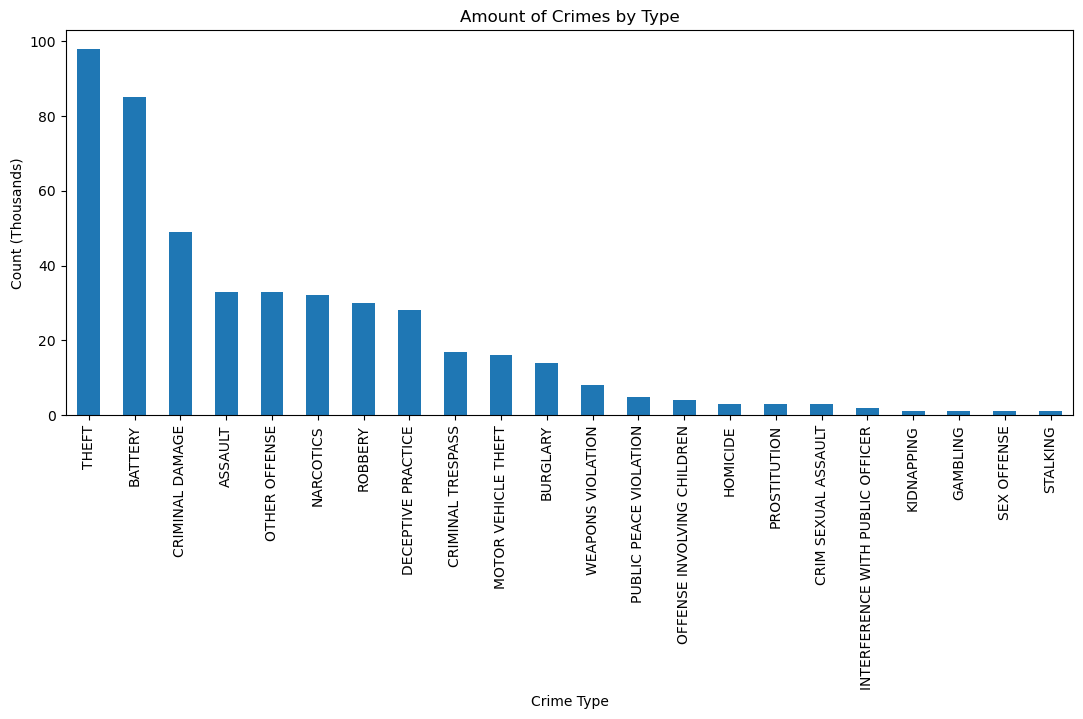

In [19]:
# Finding the count of all crime types between the years of 2012 and 2017
crime_counts = pd.Series(crime_data.groupby(['Crime Type']).size())
crime_counts = crime_counts.sort_values(ascending=False, kind='quicksort')

# Creating a histogram of the distribution
crime_counts.plot(kind='bar', figsize=(13,5), ylabel="Count (Thousands)", title="Amount of Crimes by Type")

We can see from the above distribution that the majority of crimes types are theft and battery.

Next, let us determine the crime type totals in terms of percentage. We can view the percentages in table formate to get a better understanding of the figures.

In [20]:
# Percentage of crimes committed by type
crimePercentages = pd.Series(100*(crime_data.groupby('Crime Type').size()/crime_data.groupby('Crime Type').size().sum()))
crimePercentages = crimePercentages.sort_values(ascending=False)
crimePercentages = pd.DataFrame(crimePercentages, columns=['Percentage']).reset_index()
crimePercentages

,Crime Type,Percentage
0,THEFT,20.985011
1,BATTERY,18.201285
2,CRIMINAL DAMAGE,10.492505
3,ASSAULT,7.066381
4,OTHER OFFENSE,7.066381
5,NARCOTICS,6.852248
6,ROBBERY,6.423983
7,DECEPTIVE PRACTICE,5.995717
8,CRIMINAL TRESPASS,3.640257
9,MOTOR VEHICLE THEFT,3.426124


Let us consider only the top 10 types of crime by percentage.

In [21]:
crimePercentages = crimePercentages.iloc[0:10]
print('-------------------------------\nThese crime types account for the top ',
      round(crimePercentages['Percentage'].sum(), 2), '% of all crimes commited.\n-------------------------------', sep="" )

crimePercentages

-------------------------------
These crime types account for the top 90.15% of all crimes commited.
-------------------------------


,Crime Type,Percentage
0,THEFT,20.985011
1,BATTERY,18.201285
2,CRIMINAL DAMAGE,10.492505
3,ASSAULT,7.066381
4,OTHER OFFENSE,7.066381
5,NARCOTICS,6.852248
6,ROBBERY,6.423983
7,DECEPTIVE PRACTICE,5.995717
8,CRIMINAL TRESPASS,3.640257
9,MOTOR VEHICLE THEFT,3.426124


We can see again that theft and battery again make up the mojarity of committed crimes at ~22.7% and ~18.26% respectively.

Here is a graphical comparison view of the types of crimes that make up the top 92.01% of all crimes committed:

<AxesSubplot:title={'center':'Percentage of Crimes by Type'}, xlabel='Crime Type', ylabel='Count (Percentage)'>

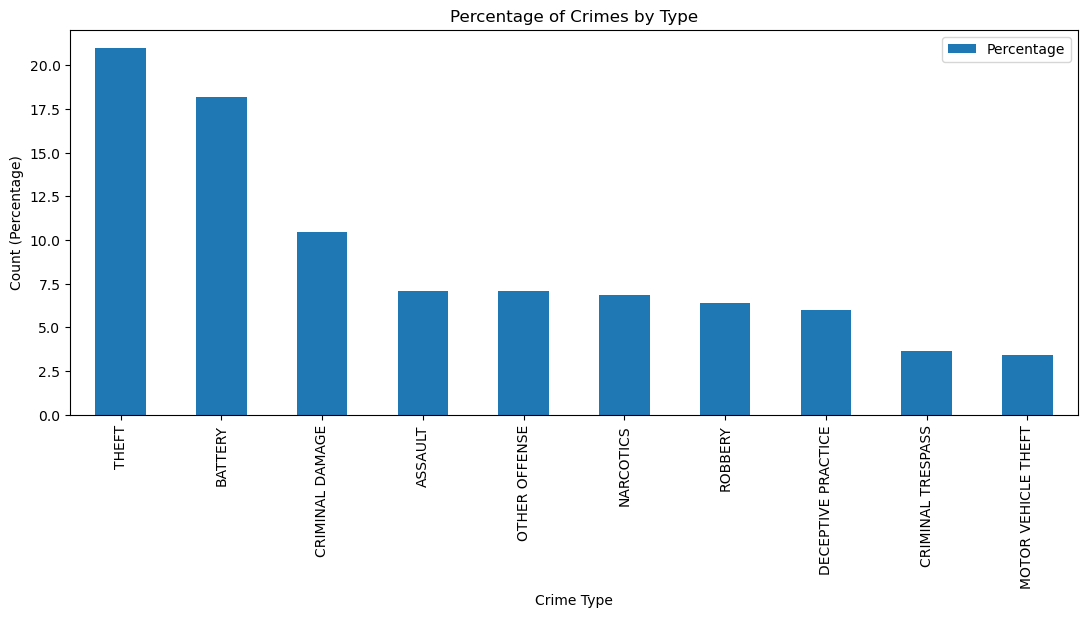

In [22]:
crimePercentages.plot(kind="bar", x='Crime Type', figsize=(13,5), ylabel="Count (Percentage)", title="Percentage of Crimes by Type")


We can now further analyze the top ~92% of crime types by determining the percentage breakdown for the locations where these crimes occur.

In [23]:
#we are retrieving only those columns that correspond to the top 10 ~92% of crimes
crime_locations = crime_data.loc[crime_data['Crime Type'].isin(crimePercentages['Crime Type']), :]
crime_locations.drop('Date', axis=1)

sum = crime_locations.groupby('Location').size().sum()

locationPercentages = pd.Series(round(100*(crime_locations.groupby('Location').size()/sum), 2)).sort_values(ascending=False)
locationPercentages = pd.DataFrame(locationPercentages, columns=['Percentage']).reset_index()
print("Here we can see the percentage of occurence of the top ~92% of crime types at each given location:")
locationPercentages


Here we can see the percentage of occurence of the top ~92% of crime types at each given location:


,Location,Percentage
0,STREET,21.62
1,RESIDENCE,14.01
2,APARTMENT,11.40
3,SIDEWALK,10.93
4,OTHER,5.46
5,"SCHOOL, PUBLIC, BUILDING",3.33
6,PARKING LOT/GARAGE(NON.RESID.),3.33
7,SMALL RETAIL STORE,3.09
8,RESIDENTIAL YARD (FRONT/BACK),2.85
9,RESIDENCE PORCH/HALLWAY,2.38


It appears that the majority of these crimes tend to occur on the street, in residences, in apartments and on the sidewalk.

We will now consider the top 10 most at risk locations:

In [24]:
locationPercentages = locationPercentages.iloc[0:10]
total = round(locationPercentages['Percentage'].sum(), 2)
print(f"The following locations in the city account for {total}% out of the top ~92% of crime types committed in Chicago:")
locationPercentages

The following locations in the city account for 78.4% out of the top ~92% of crime types committed in Chicago:


,Location,Percentage
0,STREET,21.62
1,RESIDENCE,14.01
2,APARTMENT,11.40
3,SIDEWALK,10.93
4,OTHER,5.46
5,"SCHOOL, PUBLIC, BUILDING",3.33
6,PARKING LOT/GARAGE(NON.RESID.),3.33
7,SMALL RETAIL STORE,3.09
8,RESIDENTIAL YARD (FRONT/BACK),2.85
9,RESIDENCE PORCH/HALLWAY,2.38


A graphical representation of the most at-risk locations for the top ~92% of crime types:

<AxesSubplot:title={'center':'Percentage of Most Common Crimes Committed by Location'}, xlabel='Location', ylabel='Count (Percentage)'>

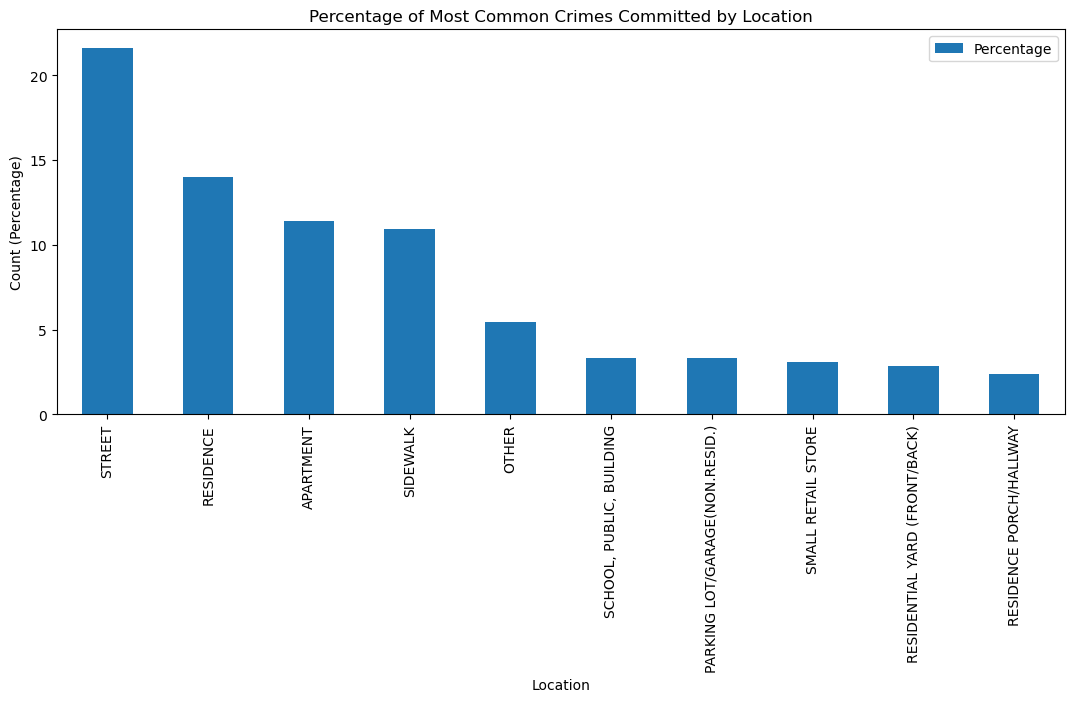

In [25]:
locationPercentages.plot(kind="bar", x = 'Location', figsize=(13,5), ylabel="Count (Percentage)", title="Percentage of Most Common Crimes Committed by Location")

We will now round the time of occurence of each of the the top ten crime types to the nearest hour and create a heatmap showcasing the most at-risk time of day for a given crime type.

In [26]:
#rounding time of crime committed to the nearest hour 
def rounder(t):
    if t.minute >= 30:
        if t.hour == 23:
            return t.replace(second=0, microsecond=0, minute=0, hour=0)
        return t.replace(second=0, microsecond=0, minute=0, hour=t.hour+1)
    else:
        return t.replace(second=0, microsecond=0, minute=0)

crime_data['Date'] = [rounder(dt.datetime.time(i)).hour for i in crime_data.Date]
crime_data

,Date,Crime Type,Location
0,0,BATTERY,APARTMENT
1,22,BATTERY,RESIDENCE
2,0,PUBLIC PEACE VIOLATION,STREET
3,22,BATTERY,SIDEWALK
4,22,THEFT,RESIDENCE
...,...,...,...
494,19,OTHER OFFENSE,SMALL RETAIL STORE
495,18,BATTERY,SIDEWALK
496,18,CRIMINAL DAMAGE,RESIDENCE
497,18,CRIMINAL DAMAGE,RESIDENCE


Removing all but the top ten previously determined crime types:

In [27]:
crimeTime = crime_data.loc[crime_data['Crime Type'].isin(crimePercentages['Crime Type'])]
crimeTime


,Date,Crime Type,Location
0,0,BATTERY,APARTMENT
1,22,BATTERY,RESIDENCE
3,22,BATTERY,SIDEWALK
4,22,THEFT,RESIDENCE
5,23,BATTERY,STREET
...,...,...,...
494,19,OTHER OFFENSE,SMALL RETAIL STORE
495,18,BATTERY,SIDEWALK
496,18,CRIMINAL DAMAGE,RESIDENCE
497,18,CRIMINAL DAMAGE,RESIDENCE


Using the top 10 crime types and their newly calculated approximate times of occurence, we are going to generate a heatmap that will provide a good visual display of the most at-risk times of day for each given crime type. 

In [28]:
from matplotlib import colors

rows = { crime : [0 for _ in range(24)] for crime in crimeTime['Crime Type'] }

vals = crimeTime.groupby(['Crime Type', 'Date']).size()

for key, value in crimeTime.groupby(['Crime Type', 'Date']):

    rows[key[0]][key[1]] = vals[key[0], key[1]]
    

index   = crimeTime['Crime Type'].unique()

columns = [i for i in range(24)]

df = pd.DataFrame(rows, index=index, columns=columns)

for key, value in rows.items():
    
    for index, count in enumerate(value):
        
        df[index][key] = count


def background_gradient(s, m=None, M=None, cmap='Greys', low=0, high=0):

    if m is None:
        m = s.min().min()
    if M is None:
        M = s.max().max()
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = s.apply(norm)

    cm = plt.cm.get_cmap(cmap)
    c = normed.applymap(lambda x: colors.rgb2hex(cm(x)))
    
    def hex_to_rgb(hex):
        return (int(hex[0:2], 16), int(hex[2:4], 16), int(hex[4:6], 16))
    
    def rgb_to_hex(r, g, b):
        return ('#{:X}{:X}{:X}').format(r, g, b)
      
    def colorit(x):
        r, g, b = hex_to_rgb(x[1:])
        
        if (r*0.299 + g*0.587 + b*0.114) > 186: 
            fore = "#000000"
        else:
            fore = "#ffffff"
        
        return 'color : {}; background-color: {}'.format(fore, x)
    
    ret = c.applymap(colorit)
    return ret


df.style.apply(background_gradient, axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
BATTERY,5,3,2,3,2,2,3,2,4,4,4,4,4,5,2,5,9,6,4,0,0,1,6,5
THEFT,1,4,2,0,0,2,2,5,3,5,3,6,5,5,6,5,5,11,6,6,4,5,6,1
ROBBERY,0,0,0,2,3,1,1,0,1,5,2,0,3,1,1,1,0,3,3,0,0,1,1,1
MOTOR VEHICLE THEFT,2,0,1,0,0,1,0,2,0,0,1,0,0,0,0,0,0,1,0,3,1,2,1,1
ASSAULT,4,2,3,0,0,0,0,0,1,2,2,1,2,1,2,4,3,1,2,1,1,0,1,0
OTHER OFFENSE,2,0,1,0,0,0,1,1,2,1,2,2,4,3,2,0,2,1,2,4,1,2,0,0
DECEPTIVE PRACTICE,6,0,0,0,0,0,0,1,0,5,1,3,2,2,2,0,1,1,2,1,0,0,0,1
CRIMINAL DAMAGE,2,5,2,1,1,1,2,0,2,2,1,1,2,2,2,4,2,3,5,1,1,1,2,4
CRIMINAL TRESPASS,0,0,0,0,0,0,1,0,1,0,0,0,4,1,1,1,3,1,3,0,0,0,0,1
NARCOTICS,2,0,0,0,0,0,0,0,0,1,4,4,1,3,8,1,2,1,4,1,0,0,0,0


From the above heatmap we can see the darker regions representing a higher crimrate at that time of day for the given crime type. It appears as though theft is most common anywhere from 12pm to around 8pm while battery seems to be more distributed but still occurring more during pm times.

## Discussion

In this exploratory analysis, I attempted to gain a better understanding of the crimes committed in the city Chicago between the years of 2012 and 2017. I wanted to determine what the relationships were between the types of crime, time of day and location. From the analyzed data and models we can see that theft and battery make up the majority of crime types. It also seems that the most at-risk locations for the common crime types are in the open; out on the street and on sidewalks as well as in higher conjested areas such as residential appartments. Finally, the times of day for the occurence of the top 10 most common crimes is in the pm times from about 12pm to 10pm. Being that one of the more common types of crimes were things such as theft and robbery, people would be safer if they travel light and avoid being alone in public between pm times.

## References

1. Source data - https://www.kaggle.com/datasets/currie32/crime_data-in-chicago?resource=downloadselect=Chicago_crime_data_2001_to_2004.csv
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz
5. datetime for formatting